In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.feature_selection import SelectFromModel

* We have loaded the necessary libraries above
* Now let's load the data

In [6]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
df['y'].value_counts()

y
1    71
0    59
2    48
Name: count, dtype: int64

In [14]:
df['y'].shape

(178,)

In [16]:
#How many samples and features are there?

# YOUR CODE HERE
print('number of samples:', df.shape, 'number of features:', df.value_counts())

number of samples: (178, 14) number of features: alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline  y
11.03    1.51        2.20  21.5               85.0       2.46           2.17        0.52                  2.01             1.90             1.71  2.87                          407.0    1    1
11.41    0.74        2.50  21.0               88.0       2.48           2.01        0.42                  1.44             3.08             1.10  2.31                          434.0    1    1
11.45    2.40        2.42  20.0               96.0       2.90           2.79        0.32                  1.83             3.25             0.80  3.39                          625.0    1    1
11.46    3.74        1.82  19.5               107.0      3.18           2.58        0.24                  3.58             2.90             0.75  2.81                          562.0    1  

In [15]:
# Quiz Q1
# How many instances are there for each class? 

df['y'].value_counts()


y
1    71
0    59
2    48
Name: count, dtype: int64

In [25]:
# Calculate the means, medians, and standard deviations of each feature

means = np.mean(df.to_numpy(), axis=0)
medians = np.median(df.to_numpy(), axis=0)
std = np.std(df.to_numpy(), axis=0)

for column, mean, medians, std in zip(df.columns, means, medians, std):
    print(f"{column}- Mean: {mean}, Median: {medians}, STD: {std}")

alcohol- Mean: 13.00061797752809, Median: 13.05, STD: 0.8095429145285168
malic_acid- Mean: 2.3363483146067416, Median: 1.8650000000000002, STD: 1.1140036269797893
ash- Mean: 2.3665168539325845, Median: 2.36, STD: 0.27357229442643255
alcalinity_of_ash- Mean: 19.49494382022472, Median: 19.5, STD: 3.3301697576582128
magnesium- Mean: 99.74157303370787, Median: 98.0, STD: 14.242307673359806
total_phenols- Mean: 2.295112359550562, Median: 2.355, STD: 0.6240905641965369
flavanoids- Mean: 2.0292696629213487, Median: 2.135, STD: 0.996048950379233
nonflavanoid_phenols- Mean: 0.3618539325842696, Median: 0.34, STD: 0.12410325988364795
proanthocyanins- Mean: 1.5908988764044945, Median: 1.5550000000000002, STD: 0.5707488486199379
color_intensity- Mean: 5.058089882022472, Median: 4.6899999999999995, STD: 2.3117646609525573
hue- Mean: 0.9574494382022471, Median: 0.965, STD: 0.22792860656507252
od280/od315_of_diluted_wines- Mean: 2.6116853932584267, Median: 2.78, STD: 0.7079932646716005
proline- Mean: 

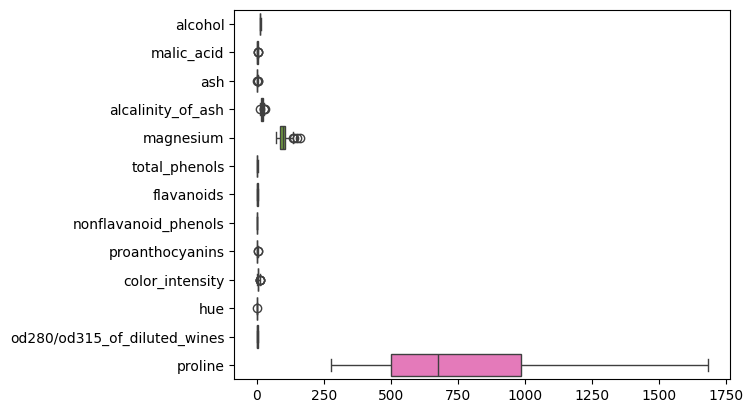

In [34]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

ex_df = df.drop(columns='y')
sns.boxplot(data=ex_df, orient='h')
plt.show()

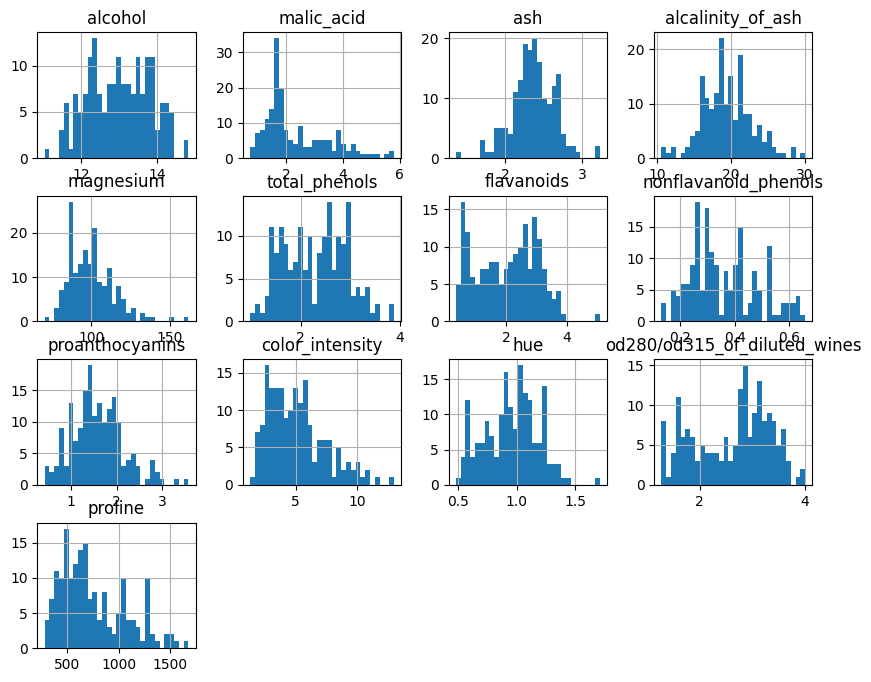

In [51]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

df.drop(columns='y').hist(figsize=(10,8), bins=30)
plt.show()

Let's do some multivariate analysis

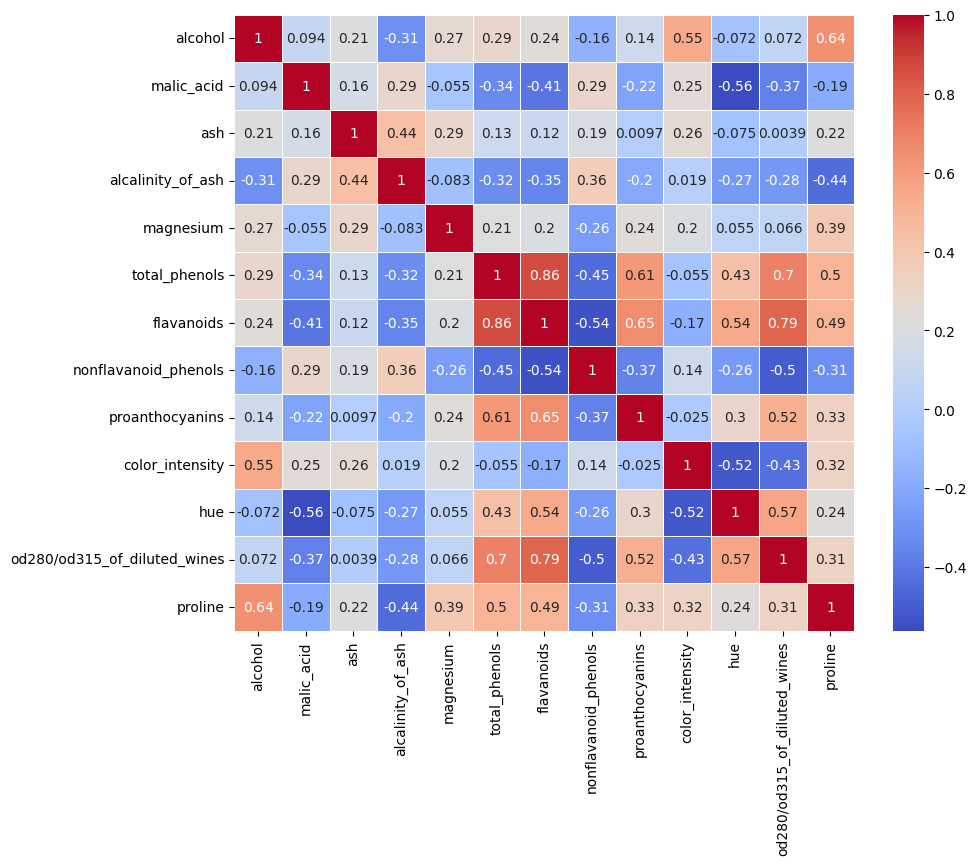

In [54]:
# Calculate the correlations between each pair of variables
cx = df.drop(columns='y').corr()
plt.figure(figsize=(10,8))

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.heatmap(cx, annot=True, cmap='coolwarm', linewidths=0.5)
# YOUR CODE HERE
plt.show()

In [ ]:
# What is the highest correlation between features?



You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE


In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

Your observations here!

## Feature selection with embedded methods

Perform feature selection using Lasso and Ridge regression methods on the original data (before standardisation). They're both available from scikit-learn:
- For Lasso classification, set a l1 penalty term to Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression -- Use C=1 and C=0.5 (note that C = 1/alpha, so values <1 mean more regularisation) and compare results
- For Ridge classification, you can do the same with a l2 penalty term or use a Ridge Classifier https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier -- Use alpha = 1

In [ ]:
# Lasso classification
# Hint: https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

# YOUR CODE HERE


In [ ]:
# Ridge classification

# YOUR CODE HERE